In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.figure_factory import create_distplot
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
import scipy.stats as stats

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
df = pd.read_csv('../input/insurance/insurance.csv')

In [3]:
# specifying value of categorical variables
df['smoker_val'] = LabelEncoder().fit_transform(df.smoker)
df['sex_val'] = LabelEncoder().fit_transform(df.sex)
df['region_val'] = LabelEncoder().fit_transform(df.region)

df.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges,smoker_val,sex_val,region_val
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,3
1,18,male,33.770,1,no,southeast,1725.55230,0,1,2
2,28,male,33.000,3,no,southeast,4449.46200,0,1,2
3,33,male,22.705,0,no,northwest,21984.47061,0,1,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1,1
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,1
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,2
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,3


In [4]:
df.describe().round(decimals=3)


,age,bmi,children,charges,smoker_val,sex_val,region_val
count,1338.000,1338.000,1338.000,1338.000,1338.000,1338.000,1338.000
mean,39.207,30.663,1.095,13270.422,0.205,0.505,1.516
std,14.050,6.098,1.205,12110.011,0.404,0.500,1.105
min,18.000,15.960,0.000,1121.874,0.000,0.000,0.000
25%,27.000,26.296,0.000,4740.287,0.000,0.000,1.000
50%,39.000,30.400,1.000,9382.033,0.000,1.000,2.000
75%,51.000,34.694,2.000,16639.913,0.000,1.000,2.000
max,64.000,53.130,5.000,63770.428,1.000,1.000,3.000


In [5]:
df.isnull().sum()

age           0
sex           0
bmi           0
children      0
smoker        0
region        0
charges       0
smoker_val    0
sex_val       0
region_val    0
dtype: int64

In [6]:
# age is correlated to the charge, since the older the person, the higher the charge it will carry
# Also BMI of the patient is a little correlated to the charge.

# So, the product of the two variables generating a bigger correlation 
df['bmi_x_age'] = df.bmi * df.age
df = df.drop(['bmi','age'],axis=1)
df.corr()

,children,charges,smoker_val,sex_val,region_val,bmi_x_age
children,1.000000,0.067998,0.007673,0.017163,0.016569,0.043180
charges,0.067998,1.000000,0.787251,0.057292,-0.006208,0.334754
smoker_val,0.007673,0.787251,1.000000,0.076185,-0.002181,-0.022946
sex_val,0.017163,0.057292,0.076185,1.000000,0.004588,0.006280
region_val,0.016569,-0.006208,-0.002181,0.004588,1.000000,0.074631
bmi_x_age,0.043180,0.334754,-0.022946,0.006280,0.074631,1.000000


In [7]:

fig = px.histogram(df,x=df.region,y=df.charges,color=df.region,title='CHARGES ON BASIS OF REGION')
fig2 = px.histogram(df,x=df.sex,y=df.charges,color=df.smoker,title='MALE VS FEMALE ON BASIS OF SMOKING OVER CHARGES')
fig3 = px.histogram(df,x=df.children,y=df.charges,color=df.children,title='DEPENDENCY OF CHILDREN ON CHARGES')

fig.show(),fig2.show(),fig3.show()


(None, None, None)

In [8]:
for cols in df.corr().columns:
    fig= px.scatter(df,x=df[cols],y=df.charges,trendline='ols',trendline_color_override= "black")
    fig.show()

In [9]:
# heatmap of pearson correlation
px.imshow(df.corr(),text_auto=True,aspect='auto',color_continuous_scale='viridis')

In [10]:

def correlation(dataset,threshold):
    cor_set = set()
    for i in range(len(dataset.corr().columns)):
        for j in range(i):
            if (dataset.corr().iloc[i,j]) >= threshold:
                colname = dataset.corr().columns[i]
                cor_set.add(colname)
    return cor_set

In [11]:
correlation(df,0.70)
# no multi-collinearity found, only smoke_val is highly correlated with target variable

{'smoker_val'}

In [12]:
px.box(x=df.children,y=df.charges,color=df.children)

In [13]:
px.box(x=df.bmi_x_age)

In [14]:
px.box(x=df.charges)

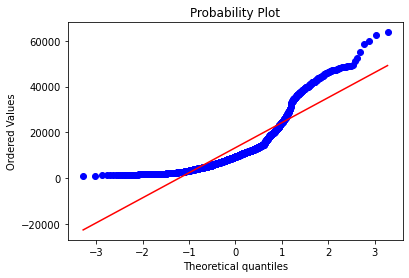

In [15]:
# ALL THE DEPENDENT VARIABLES ARE WELL DISTRIBUTED
hist_data = [df['charges'].values.tolist()]
group_label = ['distplot']
fig = create_distplot(hist_data,group_label,curve_type='kde',show_hist=False,show_rug=False)
fig.update_layout({'title':'CHARGES DISTRIBUTION PLOT','height':400,'width':600})
fig.show()

qq_plot = stats.probplot(df['charges'],dist='norm',plot=plt)
plt.show()

In [16]:
log_charge = np.log(df['charges'])
sqrt_charge = df.charges**(1/2)
expo_charge = df.charges**(1/1.2)
print('log',log_charge.skew())
print('sqrt',sqrt_charge.skew())
print('exponent',expo_charge.skew())

log -0.09009752473024582
sqrt 0.7958625166976426
exponent 1.2961210117392477


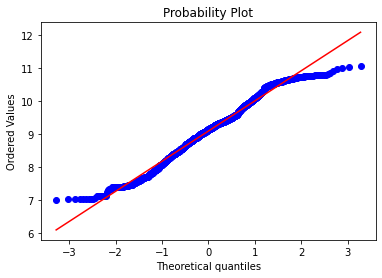

In [17]:


fig = create_distplot([log_charge],group_label,curve_type='kde',show_hist=False,show_rug=False)
fig.update_layout({'title':'CHARGES DISTRIBUTION PLOT','height':400,'width':600})
qq_plot = stats.probplot(log_charge,dist='norm',plot=plt)
fig.show()
plt.show()

In [18]:
# applying this in the whole dataset
df['charges'] = log_charge
df.head()

,sex,children,smoker,region,charges,smoker_val,sex_val,region_val,bmi_x_age
0,female,0,yes,southwest,9.734176,1,0,3,530.100
1,male,1,no,southeast,7.453302,0,1,2,607.860
2,male,3,no,southeast,8.400538,0,1,2,924.000
3,male,0,no,northwest,9.998092,0,1,1,749.265
4,male,0,no,northwest,8.260197,0,1,1,924.160


            Most of the values has been normalized.
            Let's apply it on models with the,

            FEATURES: SMOKER_VAL, BMI_X_AGE, CHILDREN
            TARGET: CHARGES

----

In [19]:
df.head()

,sex,children,smoker,region,charges,smoker_val,sex_val,region_val,bmi_x_age
0,female,0,yes,southwest,9.734176,1,0,3,530.100
1,male,1,no,southeast,7.453302,0,1,2,607.860
2,male,3,no,southeast,8.400538,0,1,2,924.000
3,male,0,no,northwest,9.998092,0,1,1,749.265
4,male,0,no,northwest,8.260197,0,1,1,924.160


In [20]:
from sklearn.model_selection import train_test_split

x = df[['smoker_val','children','bmi_x_age']]
y = df['charges']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.35,random_state=45)

x_train.shape

(869, 3)

In [21]:
from sklearn.metrics import r2_score

In [22]:
lm_model = LinearRegression()
lm_model.fit(x_train,y_train)

y_pred = lm_model.predict(x_test)

r2_score(y_test,y_pred)

0.7251497428806424

In [23]:
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [24]:
type(x_train)

numpy.ndarray

In [25]:
from sklearn.preprocessing import PolynomialFeatures

# chosen degree = 4

xpoly = PolynomialFeatures(degree=4,include_bias=False).fit_transform(x_train)
x_test_poly = PolynomialFeatures(degree=4,include_bias=False).fit_transform(x_test)

poly_lm_model = LinearRegression().fit(xpoly,y_train)

y_pred = poly_lm_model.predict(x_test_poly)

r2_score(y_test,y_pred)

0.7820491024324301

In [26]:
# Performing Lasso regression having L1 regularisation

from sklearn.linear_model import Lasso,LassoCV
from sklearn.metrics import r2_score

lasso_model = Lasso(alpha=0.001) # putting alpha = 10
lasso_model.fit(x_train,y_train)
y_pred = lasso_model.predict(x_test)

r2_score(y_test,y_pred)


0.7251879339691707

In [27]:
# comparing with LassoCV to get better evaluation score including cross_Validation
from sklearn.model_selection import KFold

# It'll itself choose the best alpha & coeff value:

cross_val = KFold(n_splits=5) # splitting dataset into 10 folds and getting the best combination of train - test data
lasso_cv_model = LassoCV(alphas=np.arange(0,5,0.001),normalize=True,cv=cross_val)
lasso_cv_model.fit(x_train,y_train)

y_pred = lasso_cv_model.predict(x_test)

print(lasso_cv_model.alpha_, lasso_cv_model.coef_) # best alpha value & coefficient
r2_score(y_test,y_pred)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: UserWarning:

Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: UserWarning:

Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: UserWarning:

Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: UserWarning:

Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.



0.0 [0.63856053 0.12098106 0.45331992]


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: UserWarning:

Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_base.py:145: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:1714: UserWarning:

With alpha=0, this algo

0.7251497428806425

In [28]:
from sklearn.linear_model import Ridge, RidgeCV

r_model = Ridge(alpha=1).fit(x_train,y_train)
y_pred = r_model.predict(x_test)
print(r2_score(y_test,y_pred))

# ridge with CV
rcv_model = RidgeCV(alphas=[0.1, 1.0, 10.0,0.01,0.001],cv=cross_val) # these are the recommended alpha vals
rcv_model.fit(x_train,y_train)
y_pred = rcv_model.predict(x_test)

print(f'best alpha val {rcv_model.alpha_} and coefficient values are {rcv_model.coef_}')
print(r2_score(y_test,y_pred))


0.7251849013069507
best alpha val 10.0 and coefficient values are [0.63128875 0.12033607 0.44820044]
0.7254109367767663
